In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Importação dos dados
ativos = ['AMD', 'INTC', 'QCOM', 'TXN', 'NVDA']
df = yf.download(ativos, start='2021-01-01')['Adj Close']
df.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AMD,INTC,NVDA,QCOM,TXN
Date,,,,,
2021-01-04,92.300003,45.187775,13.082323,137.743622,147.212860
2021-01-05,92.769997,46.042965,13.372882,141.388992,148.292770
2021-01-06,90.330002,46.488743,12.584511,140.238800,149.027878
2021-01-07,95.160004,47.480385,13.312275,144.422134,152.403732
2021-01-08,94.580002,46.989117,13.245185,145.294006,155.325836


In [3]:
# Métricas básicas de carteira
# Preços no dia do aporte
primeiro = df.iloc[0]

# Se investimos $1000 em cada papel, quantos papéis precisamos comprar de cada no primeiro dia?
num_papeis_primeiro = 1000 / primeiro

# Número de papéis arredondados no primeiro dia
comprados_primeiro = round(num_papeis_primeiro, 0)

# Preços no último dia da análise
ultimo = df.iloc[-1]

# Se investimos $1000 em cada papel, quantos papéis de cada ação poderíamos comprar no último dia?
num_papeis_ultimo = 1000 / ultimo

# Número de papéis arredondados no último dia
comprados_ultimo = round(num_papeis_ultimo, 0)

In [5]:
# Exibindo quantas ações poderiam ser compradas no primeiro e no último dia
print("Número de ações compradas com $1000 no primeiro dia:")

comprados_primeiro.to_frame()

Número de ações compradas com $1000 no primeiro dia:


,2021-01-04
Ticker,
AMD,11.0
INTC,22.0
NVDA,76.0
QCOM,7.0
TXN,7.0


In [6]:
print("\nNúmero de ações compradas com $1000 no último dia:")

comprados_ultimo.to_frame()


Número de ações compradas com $1000 no último dia:


,2024-07-02
Ticker,
AMD,6.0
INTC,32.0
NVDA,8.0
QCOM,5.0
TXN,5.0


In [7]:
# Sabemos qual era o valor que tínhamos em cada papel, por dia, multiplicando o número de papéis que compramos com os preços diários
portfolio_value = df * comprados_primeiro
portfolio_value.head()

Ticker,AMD,INTC,NVDA,QCOM,TXN
Date,,,,,
2021-01-04,1015.300034,994.131042,994.256554,964.205353,1030.490021
2021-01-05,1020.469963,1012.945229,1016.339024,989.722946,1038.049393
2021-01-06,993.630020,1022.752342,956.422821,981.671600,1043.195145
2021-01-07,1046.760040,1044.568466,1011.732895,1010.954941,1066.826126
2021-01-08,1040.380020,1033.760567,1006.634052,1017.058044,1087.280853


In [8]:
portfolio_value.tail()

Ticker,AMD,INTC,NVDA,QCOM,TXN
Date,,,,,
2024-06-26,1732.939926,671.880020,9606.400116,1381.310013,1351.700043
2024-06-27,1754.170013,672.980003,9423.239838,1366.049957,1354.009949
2024-06-28,1784.310074,681.339985,9389.040070,1394.259949,1361.709991
2024-07-01,1734.590027,678.480003,9446.800232,1400.209991,1362.200043
2024-07-02,1807.409973,683.539993,9322.919861,1401.120026,1388.939987


In [10]:
# Normalização dos valores para comparação para tê-los na mesma base, ou seja, todos começam com 100
novo_normalizado = (portfolio_value / portfolio_value.iloc[0]) * 100

novo_normalizado

Ticker,AMD,INTC,NVDA,QCOM,TXN
Date,,,,,
2021-01-04,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-05,100.509202,101.892526,102.221003,102.646489,100.733571
2021-01-06,97.865654,102.879027,96.194772,101.811466,101.232921
2021-01-07,103.098592,105.073519,101.757730,104.848509,103.526100
2021-01-08,102.470204,103.986348,101.244900,105.481477,105.511051
...,...,...,...,...,...
2024-06-26,170.682544,67.584653,966.189268,143.258903,131.170610
2024-06-27,172.773560,67.695301,947.767435,141.676247,131.394766
2024-06-28,175.742147,68.536235,944.327702,144.601971,132.141987


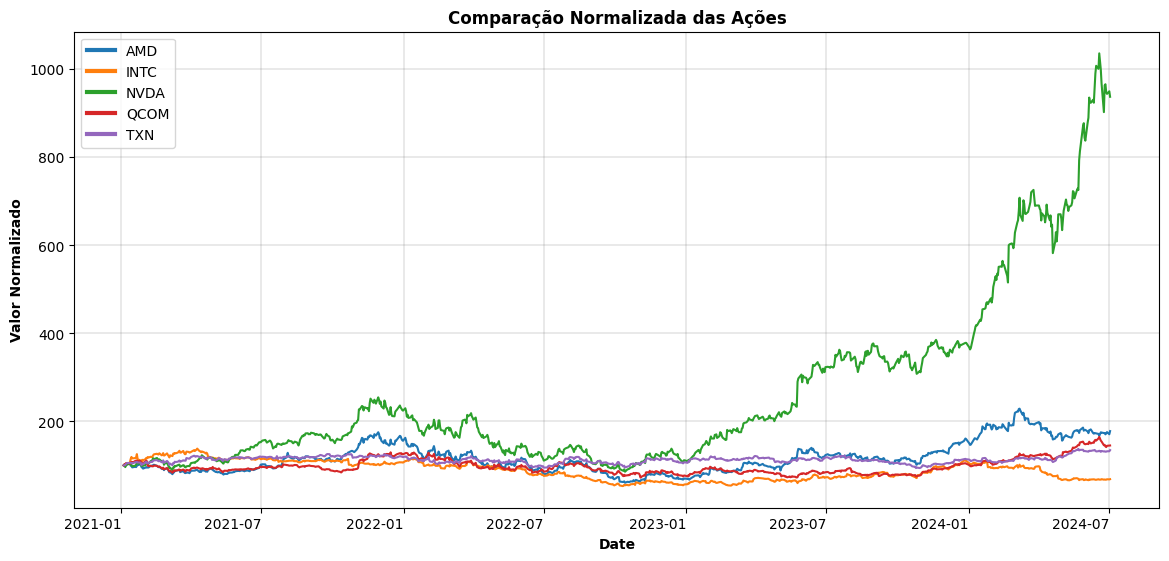

In [13]:
# Plotando a Comparação Normalizada das Ações
fig, ax = plt.subplots(figsize=(14, 7))
novo_normalizado.plot(ax=ax)
ax.set_title('Comparação Normalizada das Ações', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Valor Normalizado', fontweight='bold')
legend = ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
for line in legend.get_lines():
    line.set_linewidth(3)  # Ajusta a espessura das linhas das legendas
ax.grid(visible=True, which='both', color='grey', linestyle='-', linewidth=0.25)
plt.xticks(rotation=0)
plt.show()

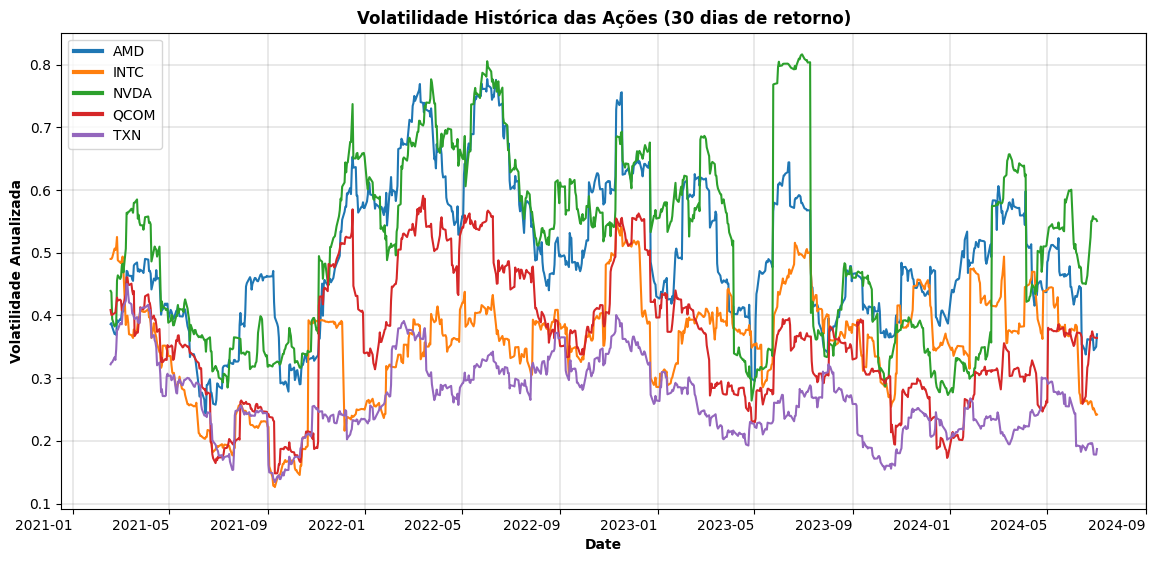

In [14]:
# Volatilidade Histórica
# Calculando a volatilidade (desvio padrão dos retornos diários) com uma janela de 30 dias
volatilidade = df.pct_change().rolling(window=30).std() * (252**0.5)

# Plotando a Volatilidade Histórica das Ações (30 dias de retorno)
fig, ax = plt.subplots(figsize=(14, 7))
volatilidade.plot(ax=ax)
ax.set_title('Volatilidade Histórica das Ações (30 dias de retorno)', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Volatilidade Anualizada', fontweight='bold')
legend = ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
for line in legend.get_lines():
    line.set_linewidth(3)  # Ajusta a espessura das linhas das legendas
ax.grid(visible=True, which='both', color='grey', linestyle='-', linewidth=0.25)
plt.xticks(rotation=0)
plt.show()